## Exercise in Photogrammetry I
## **Ex.5 : Local Operators**
### Points: 25

## A. Image convolutions

In this task you will learn how to apply local operators in the form of image convolutions.

A convolution g of a symmetric 3x3 Kernel w with an image f is defined as:

$g(i,j)= \sum_{k,l=-1}^1 f(i-k,j-l)\cdot w(k,l)$

In this exercise we will brake down the convolution in multiple steps. This allows for a more intuitive and efficient way by bypassing alot of the indexing and working with matrices.

**Pseudo Code - imageConv(f,w):**
1. *w_s*:= row and columnwise flipped kernel *w* .
2. for each pixel *f(i,j)*:
    1. *N_ij* = N8 neighborhood of the pixel *f(i,j)* (3x3 matrix).
    2. *p = w_s * N_ij*, * denotes the elementwise multiplication
    3. *g(i,j)*= sum(*p*).

**Tasks:**
1. compute the convolution for the following image *f* and kernel *w* by **hand**. Follow the provided pseudo code and write down the results of each step. Scan/ take a photo from the sheet(s) and visualize it. Compute the convolution just for the 2 pixels in the middle (*g(1,1), g(2,1)*). (7 points)

In [3]:
# import all required modules
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
%matplotlib inline

Test Image:
[[0 1 0 2]
 [0 1 3 1]
 [1 0 0 2]]
Test Kernel:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


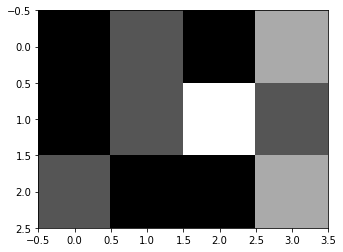

In [15]:
# Image f and Kernel w for A1
f = np.array([[0,1,0,2],[0,1,3,1],[1,0,0,2]])
print('Test Image:')
print(f)

w = np.array([[1,2,3],[4,5,6],[7,8,9]])
print('Test Kernel:')
print(w)
plt.figure()
plt.imshow(f, cmap='gray')
plt.show()

In [11]:
# Plot the result sheet with the answers of A1 here:

2. write a function ```imageConv(f,w)``` which implements the pseudo code and returns the image after applying the convolution. Compute the convolution for all pixels where the neighborhood is well defined. The border can be set to zero (also called zero padding). (8  points)

In [35]:
# May be we need to pad the input img with the constant value first.
# This will give the full size image

def imageConv(img, w):
    g = np.zeros_like(img)
    r, c = img.shape
    for i in range(1, r-1):
        for j in range(1, c-1):
            g[i, j] = np.sum(np.multiply(img[i-1: i+2, j-1:j+2], w))
    return g[1:-1, 1:-1]

Result:
[[32 50]]


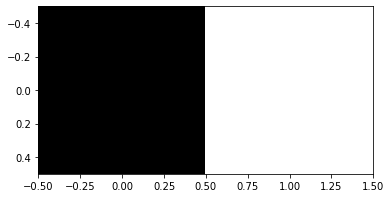

In [36]:
g = imageConv(f, w)
print('Result:')
print(g)
plt.figure()
plt.imshow(g, cmap='gray')
plt.show()

3. load the image ```images/house-downsampled.png``` as a grayscale image and visualize it. (1 point)

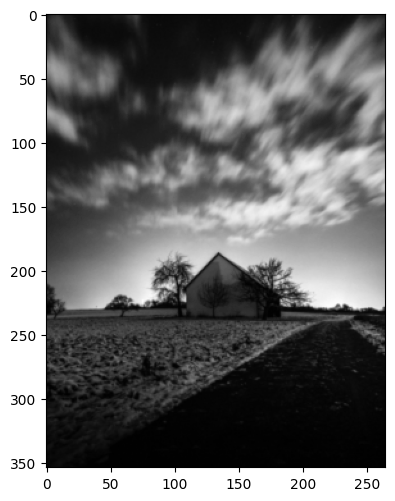

In [24]:
# Load image as gray scale and display it 
img = skimage.io.imread('./images/house-downsampled.png', as_gray=True)

plt.figure(figsize=(6, 6), dpi=100)
plt.imshow(img, cmap='gray')
plt.show()

4. compute the convolution of the image with the following **3x3** kernels and visualize the results. Use your implementation of ```imageConv(f,w)``` for applying the convolution:
    1. Box filter (1 point)
    2. Binominal filter (1 point)
    3. Sobel Operator. Compute the absolute gradient (2 points)

In [26]:
# A. Box filter
box_filter_kernel = np.ones((3, 3)) * 1./9
print("Box filter kernel:")
print(box_filter_kernel)
box_result = imageConv(img, box_fiter_kernel)

# B. Binomial filter, this is the approximation of Gaussian kernel
binomial_filter_kernel = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) * 1./16
print("Binomial filter kernel:")
print(binomial_filter_kernel)
binomial_result = imageConv(img, binomial_filter_kernel)

# C. Sobel Operator, in video 2
# This is include S_x and S_y, convolution result give G_x and G_y.
# Absolute Gradient is computed by Sqrt(G_x**2 + G_y**2)

Box filter kernel:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
Binomial filter kernel:
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


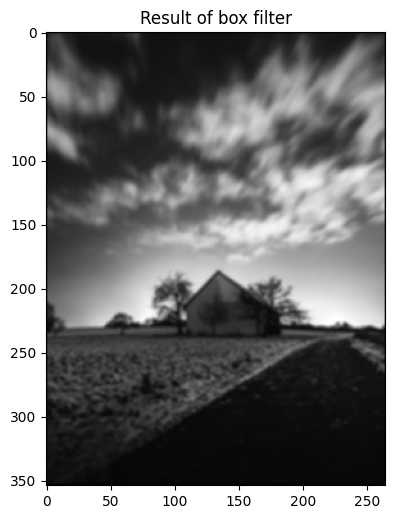

In [28]:
# Visualize result
plt.figure(figsize=(6, 6), dpi=100)
plt.title('Result of box filter')
plt.imshow(box_result, cmap='gray')
plt.show()

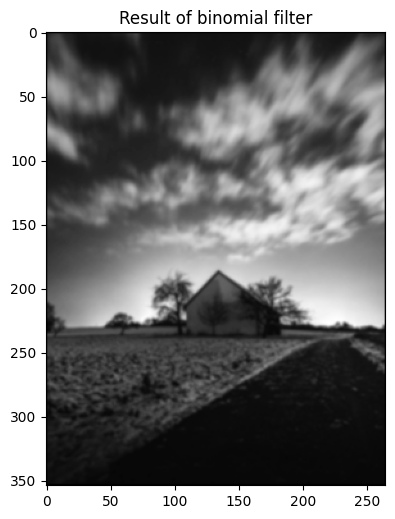

In [29]:
plt.figure(figsize=(6, 6), dpi=100)
plt.title('Result of binomial filter')
plt.imshow(binomial_result, cmap='gray')
plt.show()

5. compute the convolution of the image with the following **5x5** kernels and visualize the results. Use the function ```ndimage.convolve(...)``` from scipy for applying the convolution. **Hint:** For more information about the function press ```shift + tab``` or look into the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html#scipy.ndimage.convolve).
    1. Box filter (1 point)
    2. Binominal filter (1 point)

In [30]:
box_kernel = np.ones((5, 5)) * 1./25

base_5 = np.array([1, 4, 6, 4, 1])[:, np.newaxis]
binomial_kernel = base_5 @ base_5.reshape(1, 5)
binomial_kernel = binomial_kernel / np.sum(binomial_kernel)

print("Box filter (5x5) kernel:")
print(box_kernel)
print("Binomial filter (5x5) kernel:")
print(binomial_kernel)

Box filter (5x5) kernel:
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
Binomial filter (5x5) kernel:
[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


In [32]:
box_result_2 = ndimage.convolve(img, box_kernel, mode='constant', cval=0.0)
binomial_result_2 = ndimage.convolve(img, binomial_kernel, mode='constant', cval=0.0)

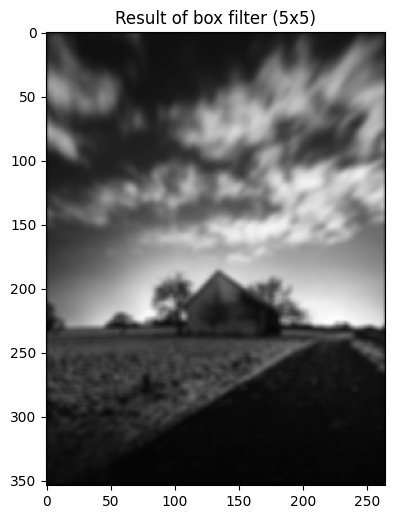

In [33]:
# Visualize result
plt.figure(figsize=(6, 6), dpi=100)
plt.title('Result of box filter (5x5)')
plt.imshow(box_result_2, cmap='gray')
plt.show()

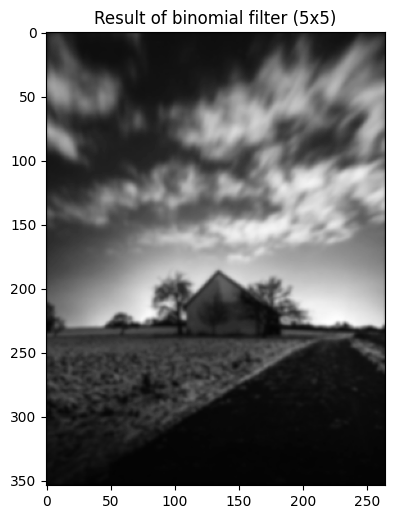

In [34]:
plt.figure(figsize=(6, 6), dpi=100)
plt.title('Result of binomial filter (5x5)')
plt.imshow(binomial_result_2, cmap='gray')
plt.show()

6. evaluate the results of the tasks 4 and 5. (3 point)

    * Binomial filter is less aggressive smoothing than the box filter (for the same neighborhood)

    * Increase the kernel size then the blur is increase